# LDA Analysis, Case Study 3: Heat

We will be exploring an LDA analysis of the "Heat Transfers from Hot to Cold" question, which asks : 

> *You may have heard that “heat” or “thermal energy” transfers from hot to cold objects, and not the other way around. Why is this the case? How do you make sense of this phenomenon?*


## I. Imports

In [1]:
# Print out all expressions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Wider Cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
# Ignore some warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning);

# General Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as re
import pickle as pkl
import copy

import sys  
sys.path.insert(0, '..')
from scripts.lda_model import *

## II. Data Import and Restructuring

In [2]:
df = pd.read_csv('../data/heat_and_temperature.csv', names = ['num', 'ID', 'drop', 'resp'])
df.drop(columns = ['num', 'ID', 'drop'], inplace = True)
df.head(5)

,resp
0,"Heat moves from a place of high to low, and sp..."
1,"Heat exists, cold is just the lack of heat. He..."
2,Energy must be transferred. Nothing is being t...
3,"This makes sense, because everything is moving..."
4,When thermal energy transfers from hot to cold...


## III. LDA Modeling

The following code will take the data processed above and convert it into a usable format for the LDA model. Before we start modeling, though, we need to set some parameters for our particular data. 

In [3]:
bigrams =               text_to_bigrams(df)
corpus =                bigrams_to_corpus(bigrams)

Let's take a look at some plots of the words used in the collection of student responses. 

Total words: 2610, unique words: 422


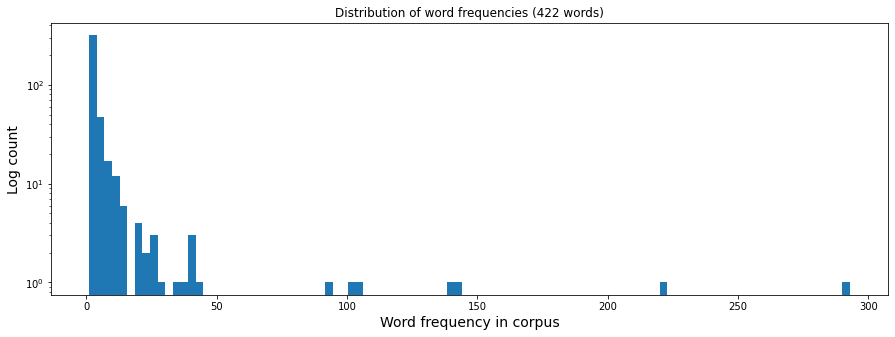

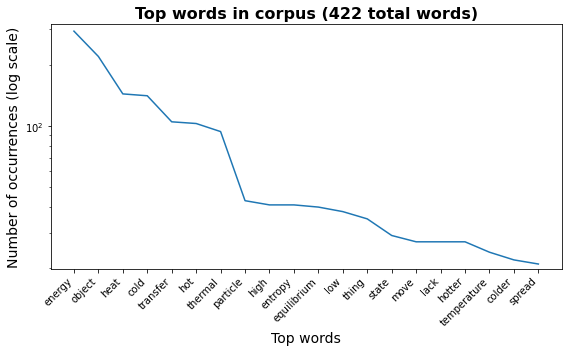

In [4]:
plot_words(corpus)

Let's now figure out the best thresholds for removing the most and least common words. A `no_above` threshold of 70% would remove words used in at least 70% of documents, and a `no_below` threshold of 3 would remove words used in only two or fewer documents. 

In [5]:
display_words_removed_at_thresholds(bigrams)


NO ABOVE THRESHOLDS


Dictionary with no_above=1 contains 422 unique words

Dictionary filtered with no_above=1.00 contains 422 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.90 contains 422 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.80 contains 422 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.70 contains 422 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.60 contains 421 unique words. 1 words removed:
 ['energy'] 

Dictionary filtered with no_above=0.50 contains 419 unique words. 2 words removed:
 ['cold', 'object'] 

Dictionary filtered with no_above=0.40 contains 417 unique words. 2 words removed:
 ['heat', 'transfer'] 

Dictionary filtered with no_above=0.30 contains 415 unique words. 2 words removed:
 ['hot', 'thermal'] 

Dictionary filtered with no_above=0.20 contains 415 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.10 contains 404 unique words

You can now set the desired threshold values based on this particular data set. 

In [6]:
no_above = 0.3
no_below = 2

In [7]:
bow, id2word= create_bow(corpus, bigrams, no_above, no_below, 
                         display_removed_words = False)

We can now proceed with the actual modeling process. Here, you can set a number of topics desired for the model, as well as the number of responses to display for each topic. By default, the number of responses displayed is three, but that can be overridden by setting a value. 

In [16]:
num_topics = 4
num_responses_displayed = 5

In [17]:
model = LDA_model(bow, id2word, bigrams, 
                  num_topics = num_topics)
model.show_topics(num_words = 10, 
                  num_topics = num_topics)

Coherence of model with 4 topics: 0.3333936403267398




[(0,
  '0.101*"thing" + 0.045*"hotter" + 0.036*"temperature" + 0.030*"colder" + 0.025*"cool" + 0.024*"sense" + 0.023*"particle" + 0.022*"tend" + 0.019*"kinetic" + 0.019*"equilibrium"'),
 (1,
  '0.078*"high" + 0.068*"particle" + 0.065*"low" + 0.040*"spread" + 0.037*"move" + 0.035*"entropy" + 0.033*"movement" + 0.030*"state" + 0.021*"concentration" + 0.016*"lack"'),
 (2,
  '0.045*"entropy" + 0.036*"molecule" + 0.034*"lack" + 0.025*"equilibrium" + 0.023*"atom" + 0.022*"hotter" + 0.021*"want" + 0.020*"way" + 0.019*"gain" + 0.018*"reach"'),
 (3,
  '0.068*"equilibrium" + 0.033*"go" + 0.030*"colder" + 0.030*"reach" + 0.030*"make_sense" + 0.029*"entropy" + 0.028*"way" + 0.025*"state" + 0.023*"thermodynamics" + 0.023*"law"')]

In [18]:
display_n_responses(df, num_responses_displayed, model, corpus, bow)

Topic 0: 0.101*"thing" + 0.045*"hotter" + 0.036*"temperature" + 0.030*"colder" + 0.025*"cool" + 0.024*"sense" + 0.023*"particle" + 0.022*"tend" + 0.019*"kinetic" + 0.019*"equilibrium"


,resp,0,1,2,3
76,"The laws of thermodynamics/entropy state that the most probable macro state is one where energy is evenly distributed throughout the system. Heat/thermal energy is a measure of the kinetic energy of each particle in a material, and things get hotter as they gain more energy. If an object is brought into contact with another object of different temperature, the hotter one will transfer some energy until they are the same temperature.",0.991457,0.0,0.0,0.0
174,"If every particle in contact with others has an equal chance of minimizing its thermal energy, transfers of thermal energy over time will cause heat to be (very close to being) evenly distributed over these particles. This means that it is more probable that hot objects will transfer heat to cold objects to attain this even distribution rather than cold objects getting colder by making hot objects hotter.",0.990961,0.0,0.0,0.0
69,"Thermal energy is just a measure of the movement of the atoms inside an object, and it would make sense that the faster moving atoms is more likely to move/transfer to another spot than the slower moving atoms.",0.988221,0.0,0.0,0.0
4,"When thermal energy transfers from hot to cold objects, it results in an ""evening out"" of the energy levels in the universe. Given enough time, the temperatures of the objects will tend to become equal. This is just an extension of the general principle that things tend to fall into equilibrium.",0.987256,0.0,0.0,0.0
181,"Because everything in the entire universe has a tendency to cool when there is no external factors. Energy is conserved, and heating things requires an increase in energy, whereas cooling things doesn't",0.987255,0.0,0.0,0.0





Topic 1: 0.078*"high" + 0.068*"particle" + 0.065*"low" + 0.040*"spread" + 0.037*"move" + 0.035*"entropy" + 0.033*"movement" + 0.030*"state" + 0.021*"concentration" + 0.016*"lack"


,resp,0,1,2,3
58,"It's the same as diffusion: particles will move from areas of high concentration to low concentration to try to spread things out in a system. We can think of energy particles (there's no such thing of course) that want to flow from where there is a lot heat to where there is less thermal energy. The proper explanation (instead of an allegory) is entropy tending to want a higher number of basic states, which is achieved by the equipartition of energy (or something like that).",0.0,0.995262,0.0,0.0
0,"Heat moves from a place of high to low, and specifically it is heat energy that moves from a place of high energy to low energy. Because ""cold"" is just a term to indicate lack of heat, the term isn't necessarily used. Heat moves from hot to cold objects because a system always tries to attain uniform equilibria, where all parts of the system have an equal amount of heat. This is why heat disperses.",0.0,0.992659,0.0,0.0
165,"Heat transfers from hot to cold because a system tends to move toward having the most basic states, or the greatest entropy. Since thermal equilibrium is the most probable state of the system, hot objects give energy to cold objects. Temperature is a measure of the thermal energy of something, so the hotter object has greater energy. Therefore, since the entropy of the system tends to increase, the system moves toward equipartitioning of energy.",0.0,0.992232,0.0,0.0
160,"Heat or thermal energy is a measure of energy, which cannot be created or destroyed, only transferred. We know that energy moves along gradients, from high concentration to low concentration. A hot object would have a high concentration of thermal energy, so it would transfer down it's gradient to a cold object, an area of low heat concentration.",0.0,0.991752,0.0,0.0
9,"This fulfills the law of entropy. Heat tends to spread to the state of least energy or with the highest amount of basic states. Therefore, heat will spread in a way that creates the greatest number of basic states by travelling from hot to cold.",0.0,0.991210,0.0,0.0





Topic 2: 0.045*"entropy" + 0.036*"molecule" + 0.034*"lack" + 0.025*"equilibrium" + 0.023*"atom" + 0.022*"hotter" + 0.021*"want" + 0.020*"way" + 0.019*"gain" + 0.018*"reach"


,resp,0,1,2,3
26,"""Cold"" as a phenomenon is simply a lack of heat. Thermal energy is the vibration of atoms and molecules, so thermal energy transferring to another object is just the vibrations of one set of molecules making another set of molecules vibrate faster. The energy of the hotter object is ""absorbed"" by the colder object.",0.0,0.0,0.989487,0.0
148,"This can be explained through equipartition of energy. The hotter object has more (thermal) energy than colder objects. Additionally, each part of the system (in this case the hot and cold objects) tends to have an equal share of the system's energy. With this information, we know that some of the energy from the hotter object will be transferred to the colder object so that they are both at the same temperature.",0.0,0.0,0.989486,0.0
61,"all things want to be at lower energy level because that is more stable (easier to maintain) so heat will transfer to colder objects because the hotter object wants to reach a more ""stable"" state.",0.0,0.0,0.987763,0.0
73,"Due to the equipartition of energy and law of entropy, it makes sense that given the opportunity for energy to decrease, it will. I think of this in a gravitational potential energy way-Being hot is unstable, so the object 'wants' to remove its heat to become more stable.",0.0,0.0,0.986670,0.0
98,"Since systems always want to go towards equilibrium, the equilibrium is the state with the lowest energy equally distributed so it seems that energy would want to get smaller rather than larger.",0.0,0.0,0.985363,0.0





Topic 3: 0.068*"equilibrium" + 0.033*"go" + 0.030*"colder" + 0.030*"reach" + 0.030*"make_sense" + 0.029*"entropy" + 0.028*"way" + 0.025*"state" + 0.023*"thermodynamics" + 0.023*"law"


,resp,0,1,2,3
113,"The system always tends toward the equilibrium state, the stable state. Also, according to the second law of thermodynamics, the entropy of a closed system towards equilibrium has a positive entropy.",0.0,0.0,0.0,0.988071
97,"You can't transfer energy from a colder object to a hotter object (spontaneously), this would break the second law of thermodynamics. It also makes sense that energy would travel to an area where there is less energy, for equal distribution of energy, as governed by increased entropy.",0.0,0.0,0.0,0.987093
179,"This is the case because they need to attain the same temperature to reach equilibrium. If the cold object were to give heat to the hot object, the cold object would become even colder and the hot object even hotter. The warmer object gives off heat to a colder object so they both meet in the middle.",0.0,0.0,0.0,0.985941
90,"This makes sense because ""coldness"" is simply a lack of energy. Moreoever, entropy states that heat wants to have a most basic state. The heat therefore goes to where it can most even out, i.e. hot goes to less hot.",0.0,0.0,0.0,0.985941
94,"This is the case because ""heat"" is the vibration of the molecules, so the hotter something is the faster it vibrates. So, the faster vibrating object passes the ""thermal energy"" to the colder object that is vibrating slower.",0.0,0.0,0.0,0.985941


Potential Ideas from LDA: 

0. Thermal energy = fast-moving atoms, and temperature increases as thermal energy increases
1. Heat diffuses (perhaps like a gas, high concentration to low concentration)
2. ? (Hot states are unstable?) (Energy is equally distributed?)
3. Systems tend toward equilibrium